## Exploracion base datos

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *





# link data set
df = pd.read_csv("/content/sample_data/titulados2023.csv", sep=',')



Mounted at /content/drive


In [139]:
# Elimina filas con valores nulos
df = df.dropna()

In [140]:
# Ver dataset 2022
df.head(5)

,anyo_matricula,mrun,gen_alu,fec_nac_alu,rango_edad_matricula,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,tipo_inst_1,...,requisito_ingreso,dur_total_carr,valor_matricula,valor_arancel,titulado,agno,rbd,cod_depe,cod_depe2,prom_notas_alu
0,2019,2069.0,1,200012,15 a 19 años,2019,1,2019,1,Universidades,...,Educación Media,10,165000,3570000,False,2018.0,7236.0,2,1,"6,2"
1,2019,2908.0,2,200005,15 a 19 años,2019,1,2019,1,Universidades,...,Educación Media,10,296400,2964000,False,2018.0,31388.0,3,2,"4,7"
2,2019,3504.0,2,200002,15 a 19 años,2019,1,2019,1,Universidades,...,Educación Media,10,175000,4385800,True,2017.0,17850.0,3,2,"6,5"
3,2019,4060.0,2,200007,15 a 19 años,2019,1,2019,1,Universidades,...,Educación Media,10,120000,2848200,True,2018.0,366.0,4,3,"5,5"
4,2019,4541.0,2,200007,15 a 19 años,2019,1,2019,1,Universidades,...,Educación Media,10,139200,4111800,False,2018.0,8927.0,1,1,"6,5"


In [141]:
# Cantidad de filas
len(df)

65217

In [142]:
# Nombre de las variables
df.columns

Index(['anyo_matricula', 'mrun', 'gen_alu', 'fec_nac_alu',
       'rango_edad_matricula', 'anio_ing_carr_ori', 'sem_ing_carr_ori',
       'anio_ing_carr_act', 'sem_ing_carr_act', 'tipo_inst_1', 'tipo_inst_2',
       'tipo_inst_3', 'cod_inst', 'nomb_carrera', 'modalidad', 'jornada',
       'tipo_plan_carr', 'region_sede', 'provincia_sede', 'comuna_sede',
       'requisito_ingreso', 'dur_total_carr', 'valor_matricula',
       'valor_arancel', 'titulado', 'agno', 'rbd', 'cod_depe', 'cod_depe2',
       'prom_notas_alu'],
      dtype='object')

In [143]:
# Descripcion de las variables
df.describe()

,anyo_matricula,mrun,gen_alu,fec_nac_alu,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,cod_inst,dur_total_carr,valor_matricula,valor_arancel,agno,rbd,cod_depe,cod_depe2
count,65217.0,6.521700e+04,65217.000000,65217.000000,65217.000000,65217.0,65217.0,65217.000000,65217.000000,65217.0,65217.000000,6.521700e+04,65217.000000,65217.000000,65217.000000,65217.000000
mean,2019.0,1.252665e+07,1.608967,199974.111919,2018.958354,1.0,2019.0,1.000015,67.430869,10.0,216769.304399,3.724802e+06,2017.505344,12122.491559,3.018676,2.098149
std,0.0,7.224469e+06,0.487985,124.877410,0.242177,0.0,0.0,0.003916,107.202416,0.0,124542.702595,9.288630e+05,0.657653,9075.925433,1.024040,0.894958
min,2019.0,2.069000e+03,1.000000,196102.000000,2016.000000,1.0,2019.0,1.000000,1.000000,10.0,75000.000000,1.130000e+06,2016.000000,1.000000,1.000000,1.000000
25%,2019.0,6.325278e+06,1.000000,199909.000000,2019.000000,1.0,2019.0,1.000000,20.000000,10.0,139200.000000,3.007000e+06,2017.000000,4829.000000,3.000000,2.000000
50%,2019.0,1.248450e+07,2.000000,200005.000000,2019.000000,1.0,2019.0,1.000000,70.000000,10.0,165000.000000,3.588000e+06,2018.000000,9411.000000,3.000000,2.000000
75%,2019.0,1.878093e+07,2.000000,200011.000000,2019.000000,1.0,2019.0,1.000000,85.000000,10.0,250000.000000,4.364400e+06,2018.000000,17843.000000,3.000000,2.000000
max,2019.0,2.576477e+07,2.000000,200207.000000,2019.000000,1.0,2019.0,2.000000,896.000000,10.0,633676.000000,6.584720e+06,2018.000000,40457.000000,6.000000,5.000000


# Descripcion del Dataset
El dataset titulados2023 contiene información individual de estudiantes matriculados en universidades
chilenas que ingresaron el año 2019 a programas de pregrado con una duración teórica total de 10
semestres y que iniciaron en el primer semestre. A cada registro se le vincula el antecedente de si la
persona obtuvo o no el título al año 2023, así como información académica proveniente de la enseñanza
media. A continuación, se muestran las variables presentes en el dataset:</br>
- **anyo_matricula:** Año académico del proceso de matrícula (ej., 2019).
- **mrun:** Identificador único del estudiante en bases de educación superior.
- **gen_alu:** Género del estudiante: 1 = Hombre, 2 = Mujer.
- **fec_nac_alu:** Fecha de nacimiento (AAAAMM o AAAAMMDD seg ́un fuente).
- **rango_edad_matricula:** Rango de edad al momento de la matrícula (ej., “20–24 a ̃nos”, “25–29
años”).
- **anio_ing_carr_ori:** Año de ingreso a la carrera de origen.
- **sem_ing_carr_ori:** Semestre de ingreso a la carrera de origen (1 = Primer semestre, 2 = Segundo
semestre).
- **anio_ing_carr_act:** Año de ingreso a la carrera actual (post convalidación o cambio).
- **seming_carr_act:** Semestre de ingreso a la carrera actual (1°, 2°).
- **tipo_inst_1:** Tipo institucional, “Centro de Formación Técnica”, “Instituto Profesional” o “Universidad”.
- **tipo_inst_2:** Detalle institucional, CFT, IP, “Universidad CRUCH” o “Universidad Privada”.
- **tip_inst_3:** Detalle ampliado, CFT, IP, “Universidad Estatal CRUCH”, “Universidad Privada” o
“Universidad Privada CRUCH”.
- **cod_inst:** Código de la institución de educación superior.
- **nomb_carrera:** Nombre de la carrera o programa.
- **modalidad:** Modalidad de impartición, “PRESENCIAL”, “SEMIPRESENCIAL” o “NO PRESENCIAL”.
- **jornada:** Jornada de la carrera, “DIURNO”, “VESPERTINO”, “SEMIPRESENCIAL”, “A DISTANCIA”
u “OTRO”.
- **tip_plan_carr:** Tipo de plan, “PLAN REGULAR”, “PLAN ESPECIAL” o “PLAN REGULAR
DE CONTINUIDAD”.
- **region_sede:** Región de la sede donde se imparte la carrera.
- **provincia_sede:** Provincia de la sede.

## Gráficos

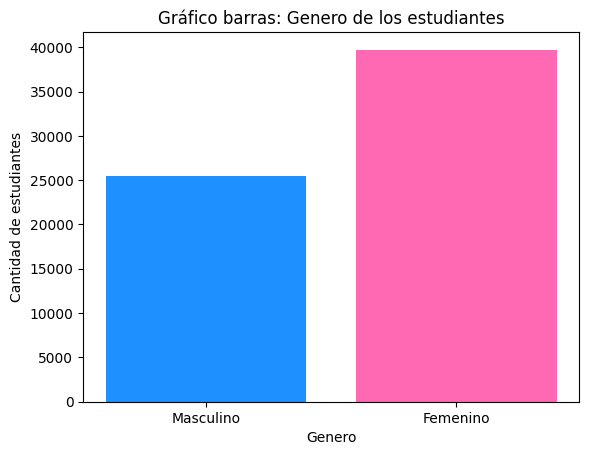

In [144]:
# Grafico barras genero del alumno
genero = ["Masculino","Femenino"]
count = [
    df['gen_alu'].value_counts()[1],
    df['gen_alu'].value_counts()[2]
    ]
colores = ["#1E90FF", "#FF69B4"] # celeste y rosado
plt.bar(genero, count, color = colores)
plt.title('Gráfico barras: Genero de los estudiantes')
plt.xlabel('Genero')
plt.ylabel('Cantidad de estudiantes')
plt.show()

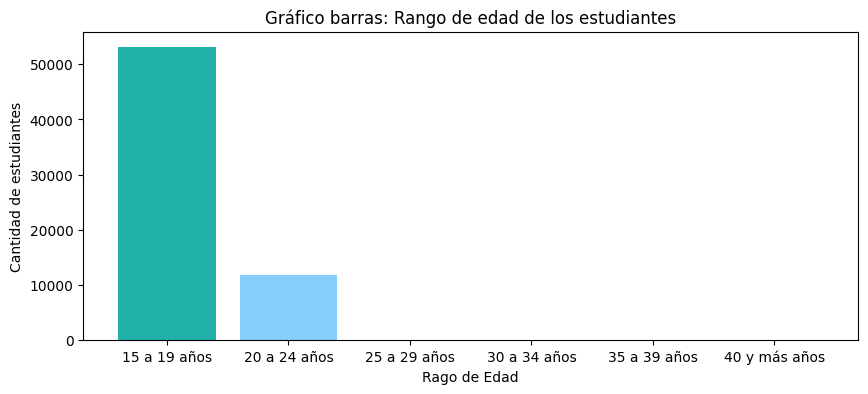

In [145]:
# Gráfico barras Rango Edad Matricula
rango = ["15 a 19 años","20 a 24 años", "25 a 29 años", "30 a 34 años", "35 a 39 años", "40 y más años"]
count = [
    df['rango_edad_matricula'].value_counts()["15 a 19 años"],
    df['rango_edad_matricula'].value_counts()["20 a 24 años"],
    df['rango_edad_matricula'].value_counts()["25 a 29 años"],
    df['rango_edad_matricula'].value_counts()["30 a 34 años"],
    df['rango_edad_matricula'].value_counts()["35 a 39 años"],
    df['rango_edad_matricula'].value_counts()["40 y más años"]
    ]
colores = ["#20B2AA", "#87CEFA", "#FFA07A", "#9370DB", "#FF4500", "#CD853F"] # verde, celeste, naranja, morado, rojo, cafe
plt.figure(figsize=(10, 4))  # ancho, alto en pulgadas
plt.bar(rango, count, color = colores )
plt.title('Gráfico barras: Rango de edad de los estudiantes')
plt.xlabel('Rago de Edad')
plt.ylabel('Cantidad de estudiantes')
plt.show()

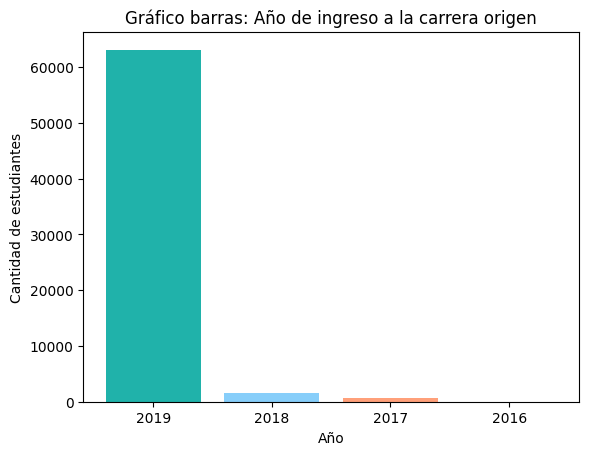

In [146]:
# Grafico Barras Año de ingreso a la carrera actual
anyo = ["2019", "2018", "2017", "2016",]
count = [
    df['anio_ing_carr_ori'].value_counts()[2019],
    df['anio_ing_carr_ori'].value_counts()[2018],
    df['anio_ing_carr_ori'].value_counts()[2017],
    df['anio_ing_carr_ori'].value_counts()[2016]
    ]
colores = ["#20B2AA", "#87CEFA", "#FFA07A", "#9370DB"] # verde, celeste, naranja, morado
plt.bar(anyo, count, color = colores)
plt.title('Gráfico barras: Año de ingreso a la carrera origen')
plt.xlabel('Año')
plt.ylabel('Cantidad de estudiantes')
plt.show()

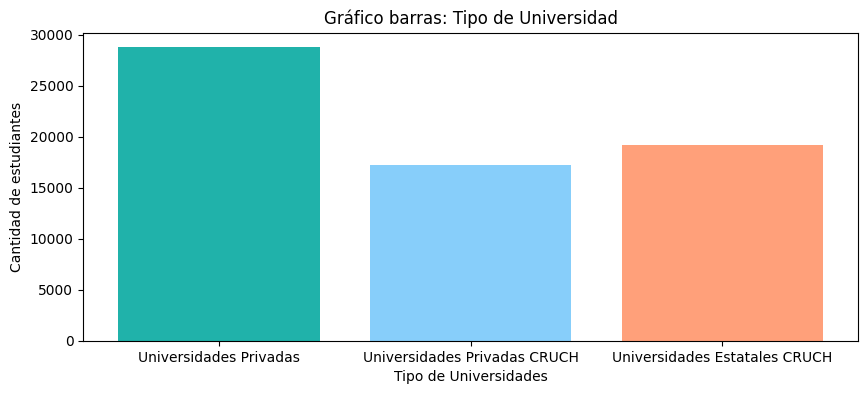

In [ ]:
# Grafico barra tipo institucional
Universidad = ["Universidades Privadas", "Universidades Privadas CRUCH", "Universidades Estatales CRUCH"]
count = [
    df['tipo_inst_3'].value_counts()["Universidades Privadas"],
    df['tipo_inst_3'].value_counts()["Universidades Privadas CRUCH"],
    df['tipo_inst_3'].value_counts()["Universidades Estatales CRUCH"]
    ]
colores = ["#20B2AA", "#87CEFA", "#FFA07A"] # verde, celeste, naranja
plt.figure(figsize=(10, 4))  # ancho, alto en pulgadas
plt.bar(Universidad, count, color = colores)
plt.title('Gráfico barras: Tipo de Universidad')
plt.xlabel('Tipo de Universidades')
plt.ylabel('Cantidad de estudiantes')
plt.show()

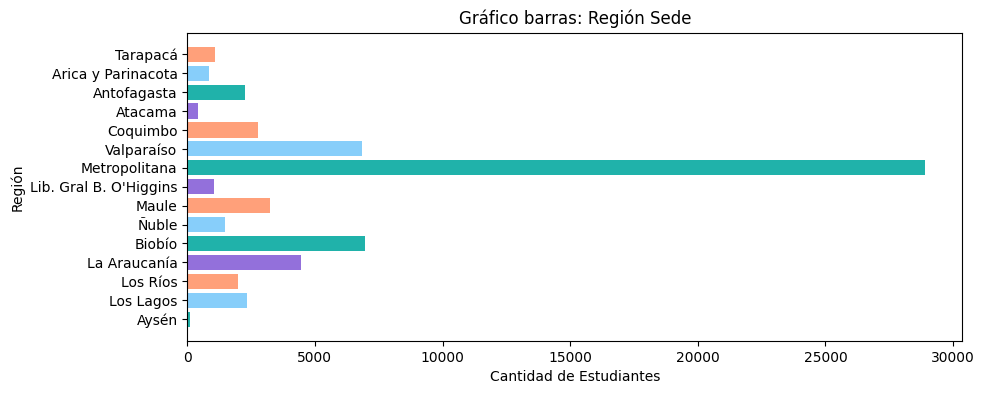

In [148]:
# Gráfico barra region sede
Region = [
    "Aysén",
    "Los Lagos",
    "Los Ríos",
    "La Araucanía",
    "Biobío",
    "Ñuble",
    "Maule",
    "Lib. Gral B. O'Higgins",
    "Metropolitana",
    "Valparaíso",
    "Coquimbo",
    "Atacama",
    "Antofagasta",
    "Arica y Parinacota",
    "Tarapacá"
    ]
count = [
    df['region_sede'].value_counts()["Aysén"],
    df['region_sede'].value_counts()["Los Lagos"],
    df['region_sede'].value_counts()["Los Ríos"],
    df['region_sede'].value_counts()["La Araucanía"],
    df['region_sede'].value_counts()["Biobío"],
    df['region_sede'].value_counts()["Ñuble"],
    df['region_sede'].value_counts()["Maule"],
    df['region_sede'].value_counts()["Lib. Gral B. O'Higgins"],
    df['region_sede'].value_counts()["Metropolitana"],
    df['region_sede'].value_counts()["Valparaíso"],
    df['region_sede'].value_counts()["Coquimbo"],
    df['region_sede'].value_counts()["Atacama"],
    df['region_sede'].value_counts()["Antofagasta"],
    df['region_sede'].value_counts()["Arica y Parinacota"],
    df['region_sede'].value_counts()["Tarapacá"]
    ]
colores = ["#20B2AA", "#87CEFA", "#FFA07A", "#9370DB"] # verde, celeste, naranja, morado
plt.figure(figsize=(10, 4))  # ancho, alto en pulgadas
plt.barh(Region, count, color = colores)
plt.title('Gráfico barras: Región Sede')
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Región')
plt.show()

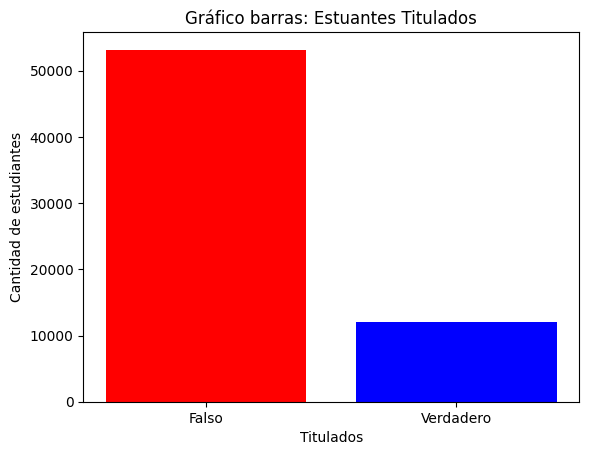

In [ ]:
# Grafico barras género del alumno
titulado = ["Falso", "Verdadero"]
count = [
    df['titulado'].value_counts()[False],
    df['titulado'].value_counts()[True]
    ]
colores = ["#FF0000", "#0000FF"]
plt.bar(titulado, count, color = colores)
plt.title('Gráfico barras: Estuantes Titulados')
plt.xlabel('Titulados')
plt.ylabel('Cantidad de estudiantes')
plt.show()

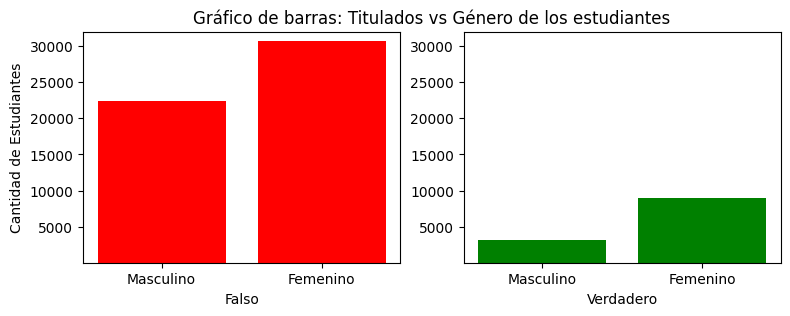

In [167]:
genero = ["Masculino","Femenino"]

Variable_titulado = df['titulado']
Genero_alumno = df['gen_alu']
Genero_alumno_verdadero = []
Genero_alumno_falso = []

for i in range(len(Variable_titulado)):
  if Variable_titulado[i] == True:
    Genero_alumno_verdadero.append(Genero_alumno[i])
  if Variable_titulado[i] == False:
    Genero_alumno_falso.append(Genero_alumno[i])

#print(Genero_alumno_verdadero)
#print(Genero_alumno_falso)
cantidad_hombres_verdadero = 0
cantidad_mujeres_verdadero = 0
for i in range(len(Genero_alumno_verdadero)):
  if Genero_alumno_verdadero[i] == 1:
    cantidad_hombres_verdadero += 1
  if Genero_alumno_verdadero[i] == 2:
    cantidad_mujeres_verdadero += 1

count_genero_verdadero = [cantidad_hombres_verdadero, cantidad_mujeres_verdadero ]

cantidad_hombres_falso = 0
cantidad_mujeres_falso = 0
for i in range(len(Genero_alumno_falso)):
  if Genero_alumno_falso[i] == 1:
    cantidad_hombres_falso += 1
  if Genero_alumno_falso[i] == 2:
    cantidad_mujeres_falso += 1

count_genero_falso = [cantidad_hombres_falso, cantidad_mujeres_falso ]

# Gráficos separados por diagnóstico

plt.figure(figsize=(9, 3))
plt.title("Gráfico de barras: Titulados vs Género de los estudiantes")
plt.axis('off')

plt.subplot(1, 2, 1)
plt.bar(genero, count_genero_falso, color='red', label='Falso')
plt.ylabel("Cantidad de Estudiantes")
plt.ylim(1, 32000)
plt.xlabel("Falso")

plt.subplot(1, 2, 2)
plt.bar(genero, count_genero_verdadero, color='green', label='Verdadero')
plt.ylim(1, 32000)
plt.xlabel("Verdadero")

plt.show()
